# Analiza zmian wartości cząsteczek PM10 miast Pomorza Zachodniego dla lat 2010 i 2020

Spis treści:
1. wstęp
2. przygotowanie danych
3. podstawowe informacje o wartościach PM10
3. analiza PM10 dla poszczególnych lat
4. analiza PM10 dla poszczególnych miast
5. analiza zmian PM10 na przestrzeni lat
6. podsumowanie

## 1. wstęp

Celem pracy jest obserwacja potencjalnych zmian zawartości cząsteczek PM10 w powietrzu w ujęciu czasowym. W ramach pracy, wybrany został obszar Pomorza Zachodniego. Do dokładniejszej analizy przygotowane dane dla miast Szczecin, Szczecinek oraz Koszalin. Jako zakres czasowy wybrane zostały dwa lata, których wartości zostały poddane dalszej analizie: 2010, 2020. DOPOPRAWY Wartości zostały zapisane w jednostsce mikrogramów na metr sześcienny µg/m3


## 2. przygotowywanie danych

Do poprawnego przygotowania danych dla dalszej analizy, wykorzystane zostały biblioteki pandas oras numpy. Do wizualizacji danych wykorzystano bibliotekę PollutionPlotter. Dla formatowania ramek danych jako tabele, posłużono się pakietem IPython.

In [1]:
import pandas as pd
import numpy as np
from py_pollution.pollutionplotter import PollutionPlotter
from IPython.display import display
import matplotlib.pyplot as plt

załadowanie danych, one wczesniej byly poprawione ze usunieto naglowki recznie i dziwne teksty, zaladowanie dwoch lat

In [2]:
zp2010 = pd.read_csv("data/zachpom_2010_pm10.csv", sep=";")
zp2020 = pd.read_csv("data/zachpom_2020_pm10.csv", sep=";")

w ramach projektu dane zostaly zagregowane do miesiecy dla obydwu lat

In [3]:
zp2010['Month'] = pd.to_datetime(zp2010['Date'])
zp2010MeanMonth = zp2010.groupby(zp2010['Month'].dt.strftime('%B')).mean()
zp2010MeanMonth['month_order'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
zp2010MeanMonth.reset_index(inplace=True)
zp2010MeanMonth.set_index('month_order', inplace=True)
zp2010MeanMonth.sort_index(inplace=True)

In [4]:
zp2020['Month'] = pd.to_datetime(zp2020['Date'])
zp2020MeanMonth = zp2020.groupby(zp2020['Month'].dt.strftime('%B')).mean()
zp2020MeanMonth['month_order'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
zp2020MeanMonth.reset_index(inplace=True)
zp2020MeanMonth.set_index('month_order', inplace=True)
zp2020MeanMonth.sort_index(inplace=True)

obliczenie średnich wartości pm10 dla poszczególnych miast i lat

In [5]:
city_names = ['Szczecin', 'Koszalin', 'Szczecinek']
mean_pm10_10 = zp2010[city_names].mean().mean()
mean_pm10_20 = zp2020[city_names].mean().mean()

## 3. podstawowe informacje o wartościach PM10

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


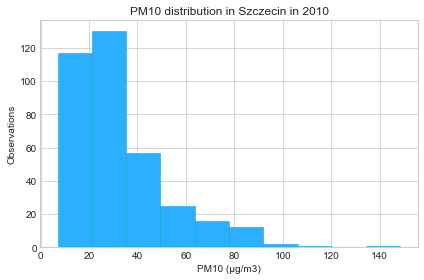

In [6]:
hist = PollutionPlotter()

config = {
    "title": "PM10 distribution in Szczecin in 2010",
    "ylabel": "Observations",
    "xlabel": "PM10 (µg/m3)",
    "avgline": None,
    "legend": "upper right",
    "xticks": 0
}

hist.set_style('seaborn-whitegrid')
hist.hist(zp2010['Szczecin'], 10, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
hist.format(config)
hist.show()

In [11]:
display(zp2010.describe())
display(zp2020.describe())


,Koszalin,Szczecinek,Szczecin
count,365.000000,365.000000,361.000000
mean,24.964932,34.755890,32.868421
std,16.581392,22.185794,19.766838
min,3.300000,6.600000,7.000000
25%,14.700000,19.700000,19.000000
50%,19.900000,28.500000,26.800000
75%,30.500000,42.100000,39.900000
max,151.100000,156.100000,148.600000


,Szczecinek,Szczecin,Koszalin
count,366.000000,366.000000,346.000000
mean,18.818852,24.160109,15.279480
std,10.544624,10.964333,7.207457
min,4.200000,6.000000,2.700000
25%,11.600000,16.950000,10.600000
50%,15.900000,21.800000,13.700000
75%,23.350000,29.150000,18.350000
max,70.400000,77.300000,52.400000


## 5. analiza zmian PM10 na przestrzeni lat

In [7]:
xlabel = ['Koszalin', 'Szczecin', 'Szczecinek']
mean2010 = [zp2010.Koszalin.mean(), zp2010.Szczecin.mean(), zp2010.Szczecinek.mean()]
mean2020 = [zp2020.Koszalin.mean(), zp2020.Szczecin.mean(), zp2020.Szczecinek.mean()]

x_axis = np.arange(len(xlabel))

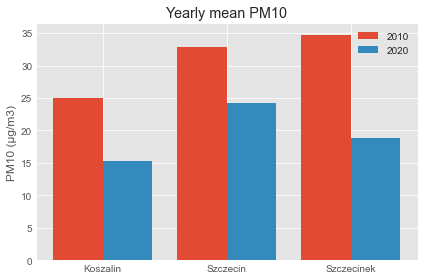

In [9]:
meanplots = PollutionPlotter()

config = {
    "title": "Yearly mean PM10",
    "ylabel": "PM10 (µg/m3)",
    "xlabel": "",
    "legend": "upper right",
    "xticks": 0,
    "avgline": None
}

meanplots.set_style('ggplot')
meanplots.bar(x_axis - 0.2,  mean2010, 0.4, x_axis, xlabel, "2010")
meanplots.bar(x_axis + 0.2,  mean2020, 0.4, x_axis, xlabel, "2020")

meanplots.format(config)

meanplots.show()

## 3. analiza PM10 dla poszczególnych lat

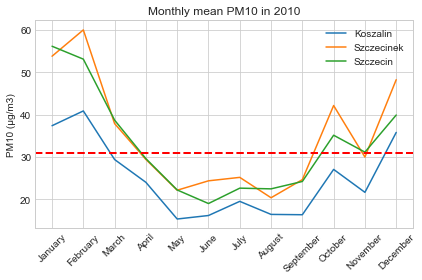

In [7]:
plot2010 = PollutionPlotter()

config = {
    "title": "Monthly mean PM10 in 2010",
    "ylabel": "PM10 (µg/m3)",
    "avgline": mean_pm10_10,
    "legend": "upper right",
    "xticks": 45
}

plot2010.set_style('seaborn-whitegrid')
plot2010.plot(zp2010MeanMonth.Month, zp2010MeanMonth.Koszalin, label="Koszalin")
plot2010.plot(zp2010MeanMonth.Month, zp2010MeanMonth.Szczecinek, label="Szczecinek")
plot2010.plot(zp2010MeanMonth.Month, zp2010MeanMonth.Szczecin, label="Szczecin")
plot2010.format(config)
plot2010.show()

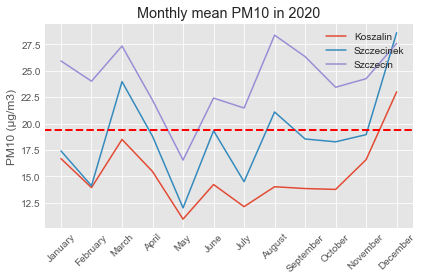

In [12]:
plot2020 = PollutionPlotter()

config = {
    "title": "Monthly mean PM10 in 2020",
    "ylabel": "PM10 (µg/m3)",
    "xlabel": "",
    "avgline": mean_pm10_20,
    "legend": "upper right",
    "xticks": 45
}

plot2020.set_style('ggplot')
plot2020.plot(zp2020MeanMonth.Month,
              zp2020MeanMonth.Koszalin,
              label="Koszalin")

plot2020.plot(zp2020MeanMonth.Month,
              zp2020MeanMonth.Szczecinek,
              label="Szczecinek")

plot2020.plot(zp2020MeanMonth.Month,
              zp2020MeanMonth.Szczecin,
              label="Szczecin")

plot2020.format(config)
plot2020.show()

## 4. analiza PM10 dla poszczególnych miast

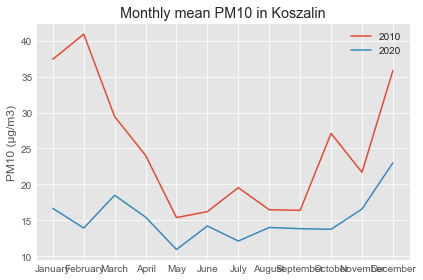

In [13]:
plotKoszalin = PollutionPlotter()

config = {
    "title": "Monthly mean PM10 in Koszalin",
    "ylabel": "PM10 (µg/m3)",
    "xlabel": "",
    "avgline": None,
    "legend": "upper right",
    "xticks": 0
}

plotKoszalin.plot(zp2010MeanMonth.Month,
              zp2010MeanMonth.Koszalin, label="2010")
plotKoszalin.plot(zp2020MeanMonth.Month,
              zp2020MeanMonth.Koszalin, label="2020")
plotKoszalin.format(config)
plotKoszalin.show()

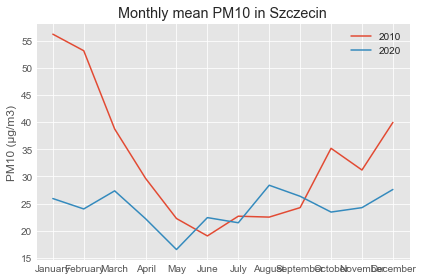

In [14]:
plotSzczecin = PollutionPlotter()

config = {
    "title": "Monthly mean PM10 in Szczecin",
    "ylabel": "PM10 (µg/m3)",
    "xlabel": "",
    "avgline": None,
    "legend": "upper right",
    "xticks": 0
}

plotSzczecin.plot(zp2010MeanMonth.Month,
              zp2010MeanMonth.Szczecin, label="2010")
plotSzczecin.plot(zp2020MeanMonth.Month,
              zp2020MeanMonth.Szczecin, label="2020")
plotSzczecin.format(config)
plotSzczecin.show()

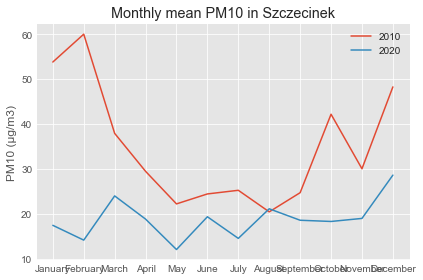

In [15]:
plotSzczecinek = PollutionPlotter()

config = {
    "title": "Monthly mean PM10 in Szczecinek",
    "ylabel": "PM10 (µg/m3)",
    "xlabel": "",
    "avgline": None,
    "legend": "upper right",
    "xticks": 0
}

plotSzczecinek.plot(zp2010MeanMonth.Month,
              zp2010MeanMonth.Szczecinek, label="2010")
plotSzczecinek.plot(zp2020MeanMonth.Month,
              zp2020MeanMonth.Szczecinek, label="2020")
plotSzczecinek.format(config)
plotSzczecinek.show()

## 7. podsumowanie